In [1]:
from ultralytics import YOLO
# model = YOLO("weight/last.pt")

In [ ]:
hiep = model.train(data="datatrain/data.yaml", epochs=20)

Ultralytics YOLOv8.2.90  Python-3.12.4 torch-2.4.1+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
engine\trainer: task=detect, mode=train, model=weight/last.pt, data=datatrain/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

train: Scanning C:\Users\DELL\src_anaconda\datatrain\train\labels.cache... 353 images, 0 backgrounds, 0 corrupt: 100%|█

WARNING  Box and segment counts should be equal, but got len(segments) = 80, len(boxes) = 1178. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\DELL\src_anaconda\datatrain\valid\labels.cache... 43 images, 2 backgrounds, 0 corrupt: 100%|████

WARNING  Box and segment counts should be equal, but got len(segments) = 16, len(boxes) = 120. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to C:\Users\DELL\runs\detect\train8\labels.jpg... 


In [2]:
model = YOLO("weight/lastv3.pt")

In [203]:
img_path = "image/product_image/short9.jpeg"
results = model(img_path)
results[0].plot()
print(type(results[0]))


image 1/1 C:\Users\DELL\src_anaconda\image\product_image\short9.jpeg: 640x512 1 Tshirt, 1 short, 111.1ms
Speed: 8.0ms preprocess, 111.1ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 512)
<class 'ultralytics.engine.results.Results'>


In [3]:
names = ['Tshirt', 'dress', 'jacket', 'pants', 'shirt', 'short', 'skirt', 'sweater']

In [105]:
import numpy as np  # Nếu bạn đang sử dụng NumPy

class ImageResult:
    def __init__(self, filename, tags, xyxy, features):
        self.filename = filename
        self.tags = tags
        self.xyxy = xyxy
        self.features = features
        self.groups = [-1] * len(tags)

    def __str__(self):
        # Tạo chuỗi hiển thị cho tags
        tags_str = ', '.join(self.tags) if self.tags else 'None'
        
        # Xử lý xyxy nếu nó là NumPy array hoặc tensor PyTorch
        if isinstance(self.xyxy, np.ndarray):
            xyxy_list = self.xyxy.tolist()  # Chuyển NumPy array thành danh sách
        elif hasattr(self.xyxy, 'tolist'):
            xyxy_list = self.xyxy.tolist()  # Chuyển tensor PyTorch thành danh sách
        else:
            xyxy_list = self.xyxy
        if isinstance(self.features, np.ndarray):
            features_list = self.features.tolist()  # Chuyển NumPy array thành danh sách
        elif hasattr(self.features, 'tolist'):
            features_list = self.features.tolist()  # Chuyển tensor PyTorch thành danh sách
        else:
            features_list = self.features
        
        # Tạo chuỗi hiển thị cho xyxy (danh sách các bounding boxes)
        xyxy_str = ', '.join([f"[{', '.join(map(str, box))}]" for box in xyxy_list]) if xyxy_list else 'None'

        features_str = ', '.join([f"[{', '.join(map(str, box))}]" for box in features_list]) if features_list else 'None'
        
        # Tạo chuỗi hiển thị hoàn chỉnh
        return (f"ImageResult(\n"
                f"  filename: '{self.filename}',\n"
                f"  tags: [{tags_str}],\n"
                f"  xyxy: [{xyxy_str}],\n)"
                f"  features: [{features_str}]\n)"
               )


In [107]:
import os
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image

# Khởi tạo mô hình ResNet50
model2 = ResNet50(weights='imagenet', include_top=False, pooling='avg')
features_list = []
def extract_features(img_path, xyxy):
    # Mở ảnh gốc
    img = image.load_img(img_path)
    # print(xyxy)
    # xyxy = np.array(xyxy)
    features = []
    for box in xyxy:
        # Chuyển đổi tọa độ từ [x1, y1, x2, y2] thành (left, upper, right, lower)
        x1, y1, x2, y2 = map(int, box)
        
        # Cắt ảnh
        cropped_img = img.crop((x1, y1, x2, y2))
        
        # Đảm bảo kích thước của ảnh cắt ra là (224, 224)
        cropped_img = cropped_img.resize((224, 224))
        
        # Chuyển đổi ảnh thành tensor
        img_array = image.img_to_array(cropped_img)
        img_array = np.expand_dims(img_array, axis=0)
        
        # Tiền xử lý ảnh cho mô hình ResNet50
        img_array = preprocess_input(img_array)
        
        # Đưa ảnh vào mô hình để lấy đặc trưng
        features_batch = model2.predict(img_array)
        features.append(features_batch.flatten())  # Chuyển đổi thành mảng 1 chiều
        features_list.append(features_batch.flatten())
    
    return features

In [109]:
import matplotlib.pyplot as plt
import os
from PIL import Image
# Đường dẫn tới folder chứa hình ảnh
features_list.clear()
folder_path = 'image/product_image'
image_paths = [os.path.join(folder_path, img_name) for img_name in os.listdir(folder_path) if img_name.endswith(('.jpg', '.jpeg', '.png'))]
# print(image_paths)
img_results = []
for i, img_path in enumerate(image_paths):
    results = model(img_path)
    
    cls_array = results[0].boxes.cls.numpy()
    conf = results[0].boxes.conf.numpy()  # Chuyển đổi tensor conf thành mảng numpy
    xyxy_array = results[0].boxes.xyxy.numpy()
    
    # Chuyển đổi cls_array và conf thành danh sách Python
    cls_array = cls_array.tolist()
    conf = conf.tolist()
    
    # Tạo danh sách tags từ cls_array dựa trên names
    tags = [names[int(idx)] for idx in cls_array]
    
    # Lọc các giá trị dựa trên độ tin cậy
    filtered_indices = [i for i, c in enumerate(conf) if c >= 0.5]
    
    # Lọc cls_array, tags và xyxy_array dựa trên filtered_indices
    filtered_cls = [cls_array[i] for i in filtered_indices]
    filtered_tags = [tags[i] for i in filtered_indices]
    filtered_xyxy = [xyxy_array[i] for i in filtered_indices]
    
    features_array = extract_features(img_path, filtered_xyxy)
    img_result = ImageResult(filename=os.path.basename(img_path), tags=filtered_tags, xyxy=filtered_xyxy, features=features_array)
    img_results.append(img_result)
    print(results[0].boxes)
    # print(img_result.features)
# for i in range(0, len(img_results)):
#     print(img_results[i])
# print(cnt)


image 1/1 C:\Users\DELL\src_anaconda\image\product_image\dress1.jpeg: 640x448 1 dress, 64.1ms
Speed: 2.0ms preprocess, 64.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 448)
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
conf: tensor([0.8626])
data: tensor([[ 62.9825,  58.5987, 133.5409, 207.5223,   0.8626,   1.0000]])
id: None
is_track: False
orig_shape: (275, 183)
shape: torch.Size([1, 6])
xywh: tensor([[ 98.2617, 133.0605,  70.5584, 148.9236]])
xywhn: tensor([[0.5369, 0.4839, 0.3856, 0.5415]])
xyxy: tensor([[ 62.9825,  58.5987, 133.5409, 207.5223]])
xyxyn: tensor([[0.3442, 0.2131, 0.7297, 0.7546]])

image 1/1 C:\Users\DELL\src_anaconda\image\product_image\dress2.jpeg: 640x416 1 dress, 50.9ms
Speed: 2.0ms preprocess, 50.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 416)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.])
co

In [110]:
features_array = np.array(features_list)
print(features_array)
print(len(features_array))
print(len(image_paths))

[[     0.7292      1.2407   0.0078654 ...    0.086348      1.3163      1.5502]
 [    0.21786     0.12532     0.29738 ...     0.34352     0.43708     0.85209]
 [    0.24181     0.75418   0.0025663 ...     0.02929    0.041142     0.92692]
 ...
 [    0.16464     0.52953           0 ...     0.21834     0.15304     0.88972]
 [          0      2.0207           0 ...    0.071707    0.007482     0.57621]
 [  0.0067695      2.2145     0.16414 ...     0.26845     0.26048      1.0702]]
51
46


In [111]:
features_arr_tag = []
filename_arr_tag = []
for name in names: 
    arr2d = []
    name2d = []
    for img_result in img_results:
        for idx, tag in enumerate(img_result.tags):
            if tag == name: 
                arr2d.append(img_result.features[idx])
                name2d.append(img_result.filename)
    features_arr_tag.append(arr2d)
    filename_arr_tag.append(name2d)
    print(name + ': ')
    print(len(arr2d))
    print(name2d)


Tshirt: 
13
['short7.jpeg', 'skirt4.jpeg', 'sweater6.jpeg', 'tshirt1.jpeg', 'tshirt10.jpeg', 'tshirt2.jpeg', 'tshirt3.jpeg', 'tshirt4.jpeg', 'tshirt5.jpeg', 'tshirt6.jpeg', 'tshirt7.jpeg', 'tshirt8.jpeg', 'tshirt9.jpeg']
dress: 
5
['dress1.jpeg', 'dress2.jpeg', 'dress3.jpeg', 'dress4.jpeg', 'dress5.jpeg']
jacket: 
0
[]
pants: 
10
['pant1.jpeg', 'pant10.jpeg', 'pant2.jpeg', 'pant3.jpeg', 'pant4.jpeg', 'pant5.jpeg', 'pant6.jpeg', 'pant7.jpeg', 'pant8.jpeg', 'pant9.jpeg']
shirt: 
0
[]
short: 
9
['short1.jpeg', 'short10.jpeg', 'short2.jpeg', 'short4.jpeg', 'short5.jpeg', 'short6.jpeg', 'short7.jpeg', 'short8.jpeg', 'short9.jpeg']
skirt: 
6
['short3.jpeg', 'skirt1.jpeg', 'skirt2.jpeg', 'skirt3.jpeg', 'skirt4.jpeg', 'skirt5.jpeg']
sweater: 
8
['pant4.jpeg', 'pant8.jpeg', 'sweater1.jpeg', 'sweater2.jpeg', 'sweater3.jpeg', 'sweater4.jpeg', 'sweater5.jpeg', 'sweater6.jpeg']


In [125]:
class Cluster:
    def __init__(self, tag, cluster_centers):
        self.tag = tag
        self.cluster_centers = cluster_centers

Tshirt:
[[   0.075396       2.168    0.033557 ...     0.16949     0.11337      1.3288]
 [   0.022208      2.9457    0.036417 ...     0.10401     0.36712     0.96813]
 [   0.044191      1.3581    0.017435 ...      0.2044     0.68702     0.94682]]
Image: short7.jpeg, is in cluster: 2
Image: skirt4.jpeg, is in cluster: 0
Image: sweater6.jpeg, is in cluster: 0
Image: tshirt1.jpeg, is in cluster: 1
Image: tshirt10.jpeg, is in cluster: 0
Image: tshirt2.jpeg, is in cluster: 1
Image: tshirt3.jpeg, is in cluster: 1
Image: tshirt4.jpeg, is in cluster: 1
Image: tshirt5.jpeg, is in cluster: 0
Image: tshirt6.jpeg, is in cluster: 1
Image: tshirt7.jpeg, is in cluster: 0
Image: tshirt8.jpeg, is in cluster: 0
Image: tshirt9.jpeg, is in cluster: 0


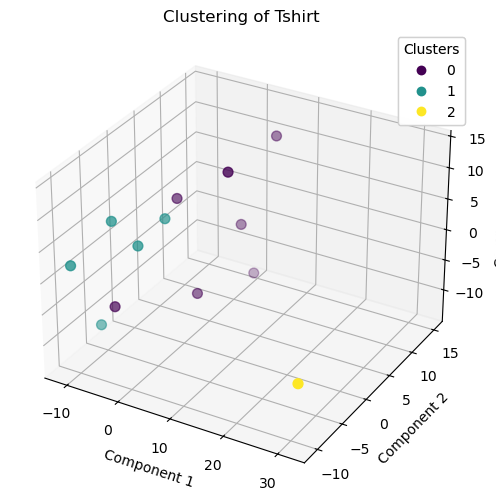

dress:
[[    0.22984     0.43975     0.14997 ...     0.18641     0.23911      0.8895]
 [    0.57125     0.71076    0.096857 ...     0.03922     0.69751      1.2264]
 [     0.7292      1.2407   0.0078654 ...    0.086348      1.3163      1.5502]]
Image: dress1.jpeg, is in cluster: 2
Image: dress2.jpeg, is in cluster: 0
Image: dress3.jpeg, is in cluster: 0
Image: dress4.jpeg, is in cluster: 1
Image: dress5.jpeg, is in cluster: 1


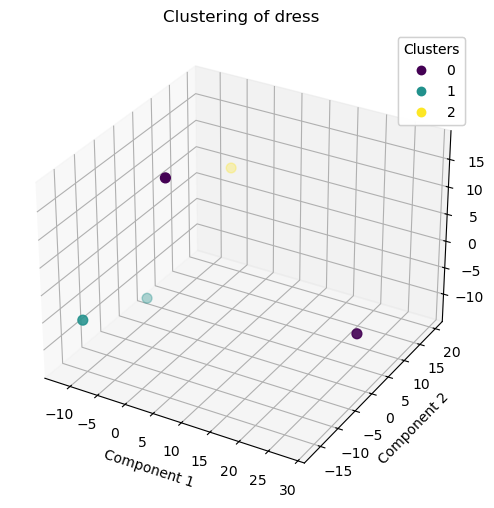

jacket:
pants:
[[    0.24176      1.5957   0.0092699 ...     0.44319     0.20783     0.60163]
 [    0.38604      2.4432    0.010098 ...    0.012888    0.074135     0.91541]
 [    0.16962      1.2911    0.010295 ...     0.39685    0.092059      1.4057]]
Image: pant1.jpeg, is in cluster: 2
Image: pant10.jpeg, is in cluster: 0
Image: pant2.jpeg, is in cluster: 1
Image: pant3.jpeg, is in cluster: 0
Image: pant4.jpeg, is in cluster: 2
Image: pant5.jpeg, is in cluster: 2
Image: pant6.jpeg, is in cluster: 2
Image: pant7.jpeg, is in cluster: 1
Image: pant8.jpeg, is in cluster: 0
Image: pant9.jpeg, is in cluster: 1


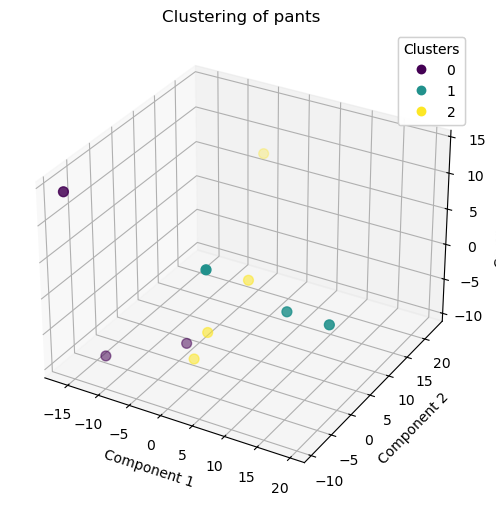

shirt:
short:
[[    0.14094      1.0263           0 ...           0    0.076008     0.67997]
 [    0.27337      0.9244    0.021098 ...     0.16135     0.28365      2.2584]
 [   0.028182      1.2663           0 ...    0.026278     0.31723      1.5201]]
Image: short1.jpeg, is in cluster: 2
Image: short10.jpeg, is in cluster: 1
Image: short2.jpeg, is in cluster: 1
Image: short4.jpeg, is in cluster: 0
Image: short5.jpeg, is in cluster: 1
Image: short6.jpeg, is in cluster: 0
Image: short7.jpeg, is in cluster: 1
Image: short8.jpeg, is in cluster: 2
Image: short9.jpeg, is in cluster: 1


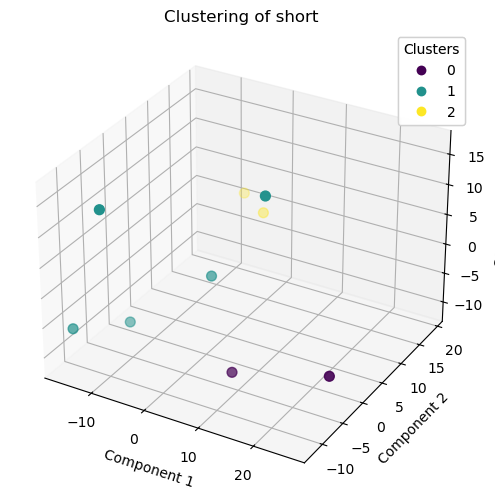

skirt:
[[   0.047243     0.44732    0.042517 ...     0.73554     0.14638      3.4352]
 [  0.0057351     0.58393    0.070384 ...    0.015353     0.65917      3.0103]
 [  0.0046577     0.67194   0.0062919 ...    0.049182      1.0157     0.70821]]
Image: short3.jpeg, is in cluster: 2
Image: skirt1.jpeg, is in cluster: 1
Image: skirt2.jpeg, is in cluster: 0
Image: skirt3.jpeg, is in cluster: 0
Image: skirt4.jpeg, is in cluster: 0
Image: skirt5.jpeg, is in cluster: 1


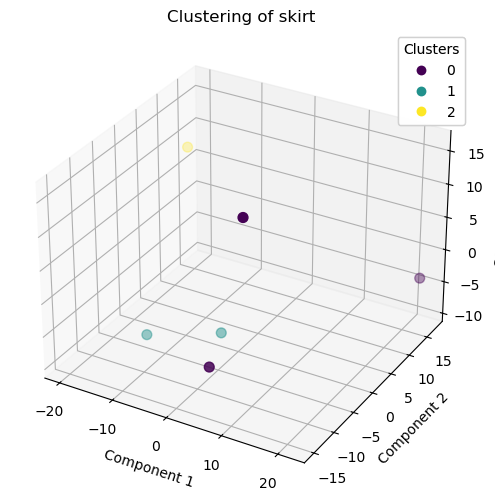

sweater:
[[    0.35897      2.2808    0.011148 ...      0.3129    0.065046      1.2394]
 [    0.21432      1.9496    0.018257 ...     0.44654     0.39197     0.37626]
 [    0.40175      1.4421           0 ...     0.09402     0.78449      6.1274]]
Image: pant4.jpeg, is in cluster: 2
Image: pant8.jpeg, is in cluster: 1
Image: sweater1.jpeg, is in cluster: 0
Image: sweater2.jpeg, is in cluster: 0
Image: sweater3.jpeg, is in cluster: 0
Image: sweater4.jpeg, is in cluster: 0
Image: sweater5.jpeg, is in cluster: 1
Image: sweater6.jpeg, is in cluster: 1


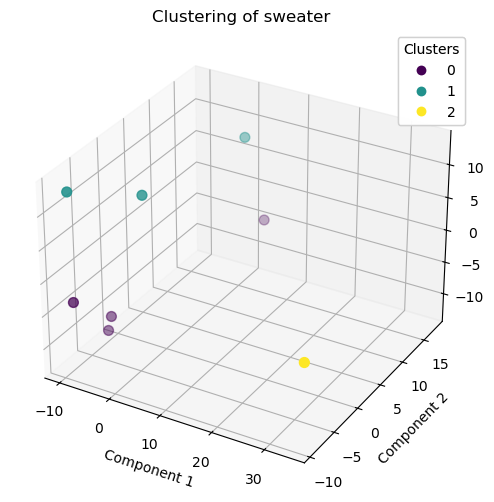

In [129]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

db_clusters = []
for idx, features_arr in enumerate(features_arr_tag): 
    print(names[idx] +':')
    if len(features_arr) == 0: continue
    num_clusters = 3
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(features_arr)
    cluster_centers = kmeans.cluster_centers_
    db_clusters.append(Cluster(tag=names[idx], cluster_centers=cluster_centers))
    print(cluster_centers)
    clusters = kmeans.predict(features_arr)
    
    for jdx, filename in enumerate(filename_arr_tag[idx]):
        print(f'Image: {filename}, is in cluster: {clusters[jdx]}')
        index = next((i for i, obj in enumerate(img_results) if obj.filename == filename), None)
        idx_gr = img_results[index].tags.index(names[idx])
        # print(img_results[index].tags)
        # print(idx_gr)
        img_results[index].groups[idx_gr] = clusters[jdx]
        # print(img_results[index].groups)

    # Vẽ biểu đồ cho các cụm
    features_arr = np.array(features_arr)
    if features_arr.shape[1] > 3:  # Nếu số chiều lớn hơn 2, sử dụng PCA để giảm chiều
        pca = PCA(n_components=3)
        reduced_features = pca.fit_transform(features_arr)
    else:
        reduced_features = features_arr  # Nếu đã là 2D, dùng luôn

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(reduced_features[:, 0], reduced_features[:, 1], reduced_features[:, 2], 
                         c=clusters, cmap='viridis', s=50)

    # Đặt tên cho các trục
    ax.set_title(f'Clustering of {names[idx]}')
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')

    # Thêm chú giải (legend)
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)

    # Hiển thị biểu đồ
    plt.show()

In [117]:
import json
import numpy as np

# Custom converter for non-serializable objects like numpy arrays
def custom_converter(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()  # Convert numpy arrays to lists
    elif isinstance(obj, (int, float, str, bool)):
        return obj  # Already JSON serializable
    else:
        return str(obj)  # Convert other non-serializable objects to strings

# Convert img_results to JSON
img_results_json = json.dumps([img_result.__dict__ for img_result in img_results], default=custom_converter, indent=4)

# Save JSON to file
with open('img_results.json', 'w') as json_file:
    json_file.write(img_results_json)

print("img_results đã được lưu vào file img_results.json")


img_results đã được lưu vào file img_results.json


In [133]:
clusters_json = json.dumps([db_cluster.__dict__ for db_cluster in db_clusters], default=custom_converter, indent=4)

# Save JSON to file
with open('clusters.json', 'w') as json_file:
    json_file.write(clusters_json)

print("clusters đã được lưu vào file clusters.json")


clusters đã được lưu vào file clusters.json
